In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium


In [5]:
# Load the dataset
df = pd.read_csv("Dataset .csv")

# Keep relevant columns
df = df[['Restaurant Name', 'City', 'Latitude', 'Longitude', 'Aggregate rating', 'Cuisines', 'Average Cost for two']]
df.dropna(inplace=True)

df.head()


,Restaurant Name,City,Latitude,Longitude,Aggregate rating,Cuisines,Average Cost for two
0,Le Petit Souffle,Makati City,14.565443,121.027535,4.8,"French, Japanese, Desserts",1100
1,Izakaya Kikufuji,Makati City,14.553708,121.014101,4.5,Japanese,1200
2,Heat - Edsa Shangri-La,Mandaluyong City,14.581404,121.056831,4.4,"Seafood, Asian, Filipino, Indian",4000
3,Ooma,Mandaluyong City,14.585318,121.056475,4.9,"Japanese, Sushi",1500
4,Sambo Kojin,Mandaluyong City,14.584450,121.057508,4.8,"Japanese, Korean",1500


<ipython-input-6-e67f74db2b46>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.head(10).values, y=city_counts.head(10).index, palette='viridis')


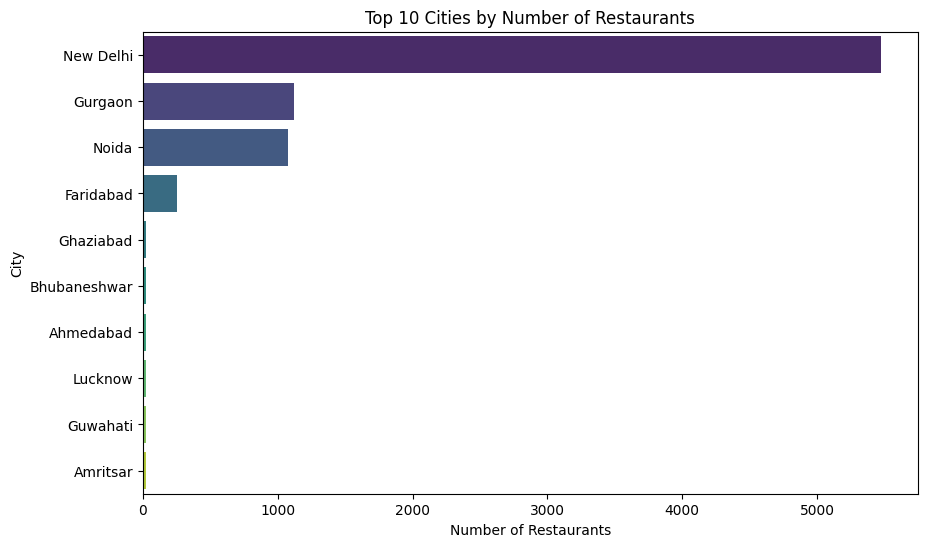

In [6]:
# Count restaurants in each city
city_counts = df['City'].value_counts()

# Plot top 10 cities
plt.figure(figsize=(10,6))
sns.barplot(x=city_counts.head(10).values, y=city_counts.head(10).index, palette='viridis')
plt.title("Top 10 Cities by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()


In [7]:
# Create a base map centered on India
map_center = [20.5937, 78.9629]  # Latitude and Longitude of India
restaurant_map = folium.Map(location=map_center, zoom_start=5)

# Add restaurants to the map (limit to 100 for performance)
for i, row in df.head(100).iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Restaurant Name'],
        tooltip=row['City']
    ).add_to(restaurant_map)

# Show the map
restaurant_map


<ipython-input-8-c3d8ba5fa706>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_city.values, y=avg_rating_city.index, palette='coolwarm')


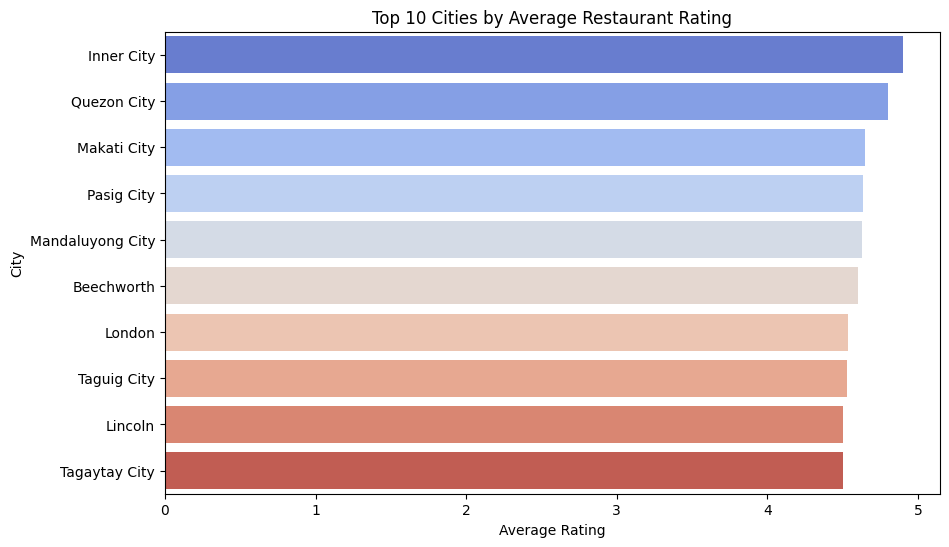

In [8]:
# Calculate average rating by city
avg_rating_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating_city.values, y=avg_rating_city.index, palette='coolwarm')
plt.title("Top 10 Cities by Average Restaurant Rating")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.show()
